# 잡코리아 일자리 지역 조사(데이터직군)

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from datetime import datetime
import time

date = datetime.now().strftime('%Y-%m-%d')

In [ ]:
from selenium.webdriver import Chrome
driver = Chrome()
driver.get('http://www.jobkorea.co.kr')

In [ ]:
# 검색창 선택
from selenium.webdriver.common.by import By
search = driver.find_element(By.CSS_SELECTOR, "input[placeholder='JOB 검색']")
search.send_keys("데이터")

In [ ]:
from selenium.webdriver.common.keys import Keys
search.send_keys('\n')

In [ ]:
#내가 쓴 코드
# def job_search():

#     driver = Chrome()
#     driver.get('http://www.jobkorea.co.kr')
#     search = driver.find_element(By.CSS_SELECTOR, "input[placeholder='JOB 검색']")
#     search.send_keys("데이터")
#     search.send_keys('\n')

# response = requests.get(url) 
# soup = BeautifulSoup(response.text, 'html.parser')
# articles = soup.select(".block1")

# data=[]

# for article in articles:
#     title = article.select_one('.articleSubject > a').text
#     summary = article.select_one('.articleSummary').contents[0].text.strip()
#     wdate = article.select_one('.wdate').contents[0].text.strip()
#     press = article.select_one('.press').contents[0].text.strip()
#     href = article.select_one('.articleSubject >a').attrs['href']
#     article_id = href.split('=')[1].split('&')[0]
#     office_id = href.split('office_id=')[1].split('&')[0]
#     link = f'https://n.news.naver.com/mnews/article/{office_id}/{article_id}'
#     data.append({"title":title, "summary":summary, "press":press, "wdate":wdate, "link":link})

In [ ]:
# 잼민이가 수정해준 코드
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time
import pandas as pd

def job_search_simple_location():
    
    keyword = "데이터"
    max_page = 10  
    
    data_list = []
    driver = webdriver.Chrome()
    
    for page in range(1, max_page + 1):
        print(f"\n=== {page} 페이지 수집 중... ===")
        
        # 1. 페이지 이동
        url = f"https://www.jobkorea.co.kr/Search/?stext={keyword}&tabType=recruit&Page={page}"
        driver.get(url)
        time.sleep(3) # 로딩 대기
        
        # 2. HTML 가져오기
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        
        # 3. 공고 카드 리스트 찾기
        job_cards = soup.select('div[data-sentry-component="CardJob"]')
        print(f"  -> {len(job_cards)}개의 공고 발견")
        
        for card in job_cards:
            try:
                # 제목
                title_tag = card.select_one('span[class*="Typography_variant_size18"]')
                title = title_tag.text.strip() if title_tag else "제목 없음"
                
                # 회사명
                company_tag = card.select_one('span[class*="Typography_variant_size16"]')
                company = company_tag.text.strip() if company_tag else "회사명 없음"
                
                # 링크
                link_tag = card.select_one('a[href*="/Recruit/GI_Read/"]')
                link = "https://www.jobkorea.co.kr" + link_tag['href'] if link_tag else ""

                # 위치 정보
                location = "지역 정보 없음"
                
                # 카드 안에 있는 모든 회색 칩(GrayChip)들을 가져옴
                chips = card.select('div[data-sentry-component="GrayChip"]')
                
                for chip in chips:
                    # 칩 안에 '지도 아이콘(place2)' 클래스가 있는지 확인
                    if chip.select_one('.emoji--basicemoji-place2'):
                        location = chip.text.strip() 
                        break 

                # 데이터 저장
                data_list.append({
                    "회사명": company,
                    "제목": title,
                    "지역": location,
                    "링크": link
                })
                
            except Exception as e:
                continue

    # 4. 엑셀(CSV)로 저장
    if data_list:
        df = pd.DataFrame(data_list)
        
        # 컬럼 순서 정렬
        df = df[['지역', '회사명', '제목', '링크']]
        
        filename = f"data/jobkorea_{keyword}_list.csv"
        df.to_csv(filename, index=False, encoding="utf-8-sig")
        
        print(f"\n[성공] 총 {len(df)}건 저장 완료!")
        print(df.head()) # 결과 미리보기
    else:
        print("수집된 데이터가 없습니다.")

# 함수 실행
job_search_simple_location()

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [9]:
job_Data = pd.read_csv('data/jobkorea_데이터_list.csv')
job_Data

,지역,회사명,제목,링크
0,서울 중구,㈜웅진,DBA(Database Administrator)모집,https://www.jobkorea.co.krhttps://www.jobkorea...
1,서울 송파구 외 1,㈜시오랩,"[강소기업] 보안솔루션 유지보수 엔지니어 모집(과장,차장)",https://www.jobkorea.co.krhttps://www.jobkorea...
2,울산 북구,현대오토에버㈜,머신비전 시스템 운영 (울산),https://www.jobkorea.co.krhttps://www.jobkorea...
3,충북 청주시 외 6,㈜엠비젼,[재택가능] 비전 검사장비 엔지니어 - S/W 개발&셋업,https://www.jobkorea.co.krhttps://www.jobkorea...
4,서울 강남구,㈜케이엠에스테크놀로지,IT 보안 솔루션 컨설턴트 (경력) 채용,https://www.jobkorea.co.krhttps://www.jobkorea...
...,...,...,...,...
275,경기 성남시,㈜카카오,Data Engineer (경력),https://www.jobkorea.co.krhttps://www.jobkorea...
276,서울 용산구,씨제이올리브영(주),Forward Deployed Data Scientist,https://www.jobkorea.co.krhttps://www.jobkorea...
277,경기 성남시,㈜넥슨,[인텔리전스랩스그룹] 게임 데이터 분석가,https://www.jobkorea.co.krhttps://www.jobkorea...
278,서울 영등포구,나이스지니데이타㈜,NICE지니데이타 (주) 데이터 엔지니어 채용,https://www.jobkorea.co.krhttps://www.jobkorea...


In [ ]:
job_location = job_Data['지역']

In [11]:
job_location

0           서울 중구
1      서울 송파구 외 1
2           울산 북구
3      충북 청주시 외 6
4          서울 강남구
          ...    
275        경기 성남시
276        서울 용산구
277        경기 성남시
278       서울 영등포구
279    서울 송파구 외 9
Name: 지역, Length: 280, dtype: object

In [12]:
job_location_df = pd.DataFrame(job_location)
job_location_df

,지역
0,서울 중구
1,서울 송파구 외 1
2,울산 북구
3,충북 청주시 외 6
4,서울 강남구
...,...
275,경기 성남시
276,서울 용산구
277,경기 성남시
278,서울 영등포구


In [13]:
def label(text):
    if '서울' in text: return 0
    elif '경기' in text: return 1
    else: return 2

job_location_df['label'] = job_location_df['지역'].apply(label)

job_location_df

,지역,label
0,서울 중구,0
1,서울 송파구 외 1,0
2,울산 북구,2
3,충북 청주시 외 6,2
4,서울 강남구,0
...,...,...
275,경기 성남시,1
276,서울 용산구,0
277,경기 성남시,1
278,서울 영등포구,0


In [15]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(job_location_df['지역'])
y = job_location_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(224, 23) (56, 23) (224,) (56,)


In [16]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [17]:
pred = dt.predict(X_test)

In [24]:
def classify_region(text):
    if pd.isna(text): return "미분류"
    
    text = str(text)
    if '서울' in text:
        return '서울'
    elif any(keyword in text for keyword in ['경기', '인천', '수원', '성남', '판교', '분당']):
        return '경기/인천'
    else:
        return '그 외 지역'
    
    

In [28]:
job_Data['권역'] = job_Data['지역'].apply(classify_region)

In [29]:
job_Data

,지역,회사명,제목,링크,권역
0,서울 중구,㈜웅진,DBA(Database Administrator)모집,https://www.jobkorea.co.krhttps://www.jobkorea...,서울
1,서울 송파구 외 1,㈜시오랩,"[강소기업] 보안솔루션 유지보수 엔지니어 모집(과장,차장)",https://www.jobkorea.co.krhttps://www.jobkorea...,서울
2,울산 북구,현대오토에버㈜,머신비전 시스템 운영 (울산),https://www.jobkorea.co.krhttps://www.jobkorea...,그 외 지역
3,충북 청주시 외 6,㈜엠비젼,[재택가능] 비전 검사장비 엔지니어 - S/W 개발&셋업,https://www.jobkorea.co.krhttps://www.jobkorea...,그 외 지역
4,서울 강남구,㈜케이엠에스테크놀로지,IT 보안 솔루션 컨설턴트 (경력) 채용,https://www.jobkorea.co.krhttps://www.jobkorea...,서울
...,...,...,...,...,...
275,경기 성남시,㈜카카오,Data Engineer (경력),https://www.jobkorea.co.krhttps://www.jobkorea...,경기/인천
276,서울 용산구,씨제이올리브영(주),Forward Deployed Data Scientist,https://www.jobkorea.co.krhttps://www.jobkorea...,서울
277,경기 성남시,㈜넥슨,[인텔리전스랩스그룹] 게임 데이터 분석가,https://www.jobkorea.co.krhttps://www.jobkorea...,경기/인천
278,서울 영등포구,나이스지니데이타㈜,NICE지니데이타 (주) 데이터 엔지니어 채용,https://www.jobkorea.co.krhttps://www.jobkorea...,서울


Text(0.5, 1.0, '권역별 공고 수')

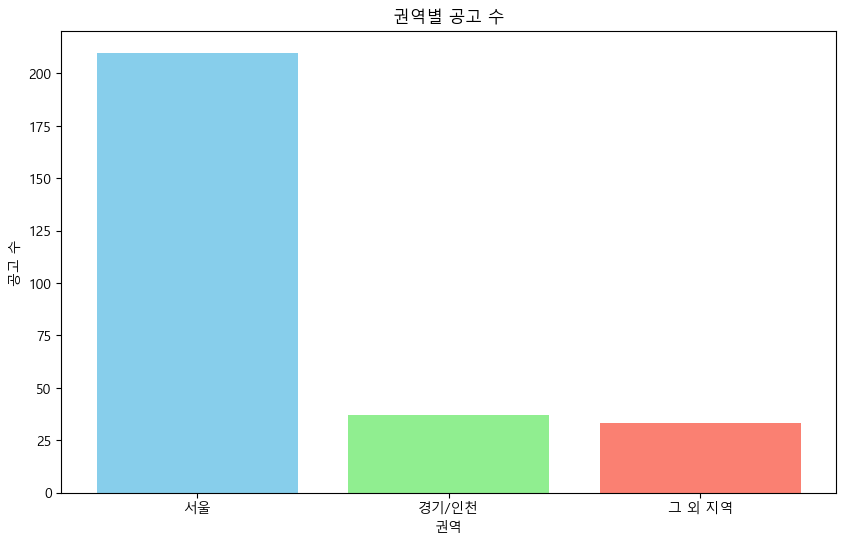

In [35]:
region_counts = job_Data['권역'].value_counts()

plt.rc('font', family='Malgun Gothic') 

plt.figure(figsize=(10, 6))
bars = plt.bar(region_counts.index, region_counts.values, color=['skyblue', 'lightgreen', 'salmon'])

plt.xlabel('권역')
plt.ylabel('공고 수')
plt.title('권역별 공고 수')